# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

# Reading the Dataset

In [2]:
data = pd.read_csv(r"C:\Users\HOME\Downloads\car_age_price.csv")

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
Year     112 non-null int64
Price    112 non-null int64
dtypes: int64(2)
memory usage: 1.8 KB


In [5]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
data.columns

Index(['Year', 'Price'], dtype='object')

# Checking Outliers in the dataset

Text(0.5,1,'Year')

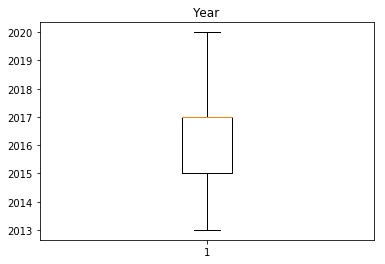

In [7]:
plt.boxplot(data['Year']) 
plt.title('Year')

Text(0.5,1,'Price')

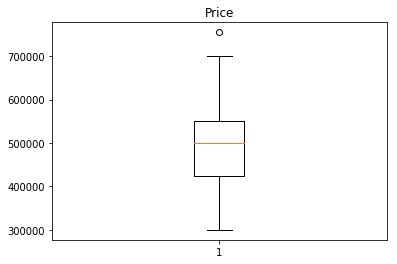

In [8]:
plt.boxplot(data['Price']) 
plt.title('Price')

# Splitting the Data and Target

In [9]:
X=data.drop(('Price'),axis=1)
y=data['Price']

# Splitting the Data into Training Data and Test Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42,test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(89, 1) (23, 1) (89,) (23,)


# Model Training

#1. Linear Regression

In [11]:
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)
predictions_1=model.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
print('The mean squared error value is',mean_squared_error(y_test,predictions_1))
print('The r squared value is',r2_score(y_test,predictions_1))

The mean squared error value is 4326906256.829671
The r squared value is 0.36759313425902185


# Best linear relationship between year and price using scatter plot

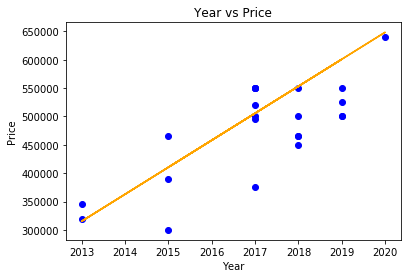

In [12]:
plt.scatter( X_test, y_test, color = 'blue' )
plt.plot( X_test, predictions_1, color = 'orange' )
plt.title( 'Year vs Price' )
plt.xlabel( 'Year' )
plt.ylabel( 'Price' )
plt.show()

# Model Training¶

#2. Lasso Regression

In [13]:
lasso = Lasso(alpha=1)
lasso.fit(X_train,y_train)
predictions_2 = lasso.predict(X_test)

print('The mean squared error value is',mean_squared_error(y_test,predictions_2))
print('The r squared value is',r2_score(y_test,predictions_2))

The mean squared error value is 4326859771.015669
The r squared value is 0.3675999284778446


# Both the Models showing similar performance

# Predicted price of a 2022 model second-hand grand i10 

In [14]:
predict2022=model.predict([[2022]])
predict2022

array([743601.61594504])

In [15]:
print('Possible price of a 2022 model second-hand grand i10 is',round(float(predict2022)))

Possible price of a 2022 model second-hand grand i10 is 743602
